# Assignement-17-Q1-SVM
classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [2]:
data = pd.read_csv('forestfires.csv')
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


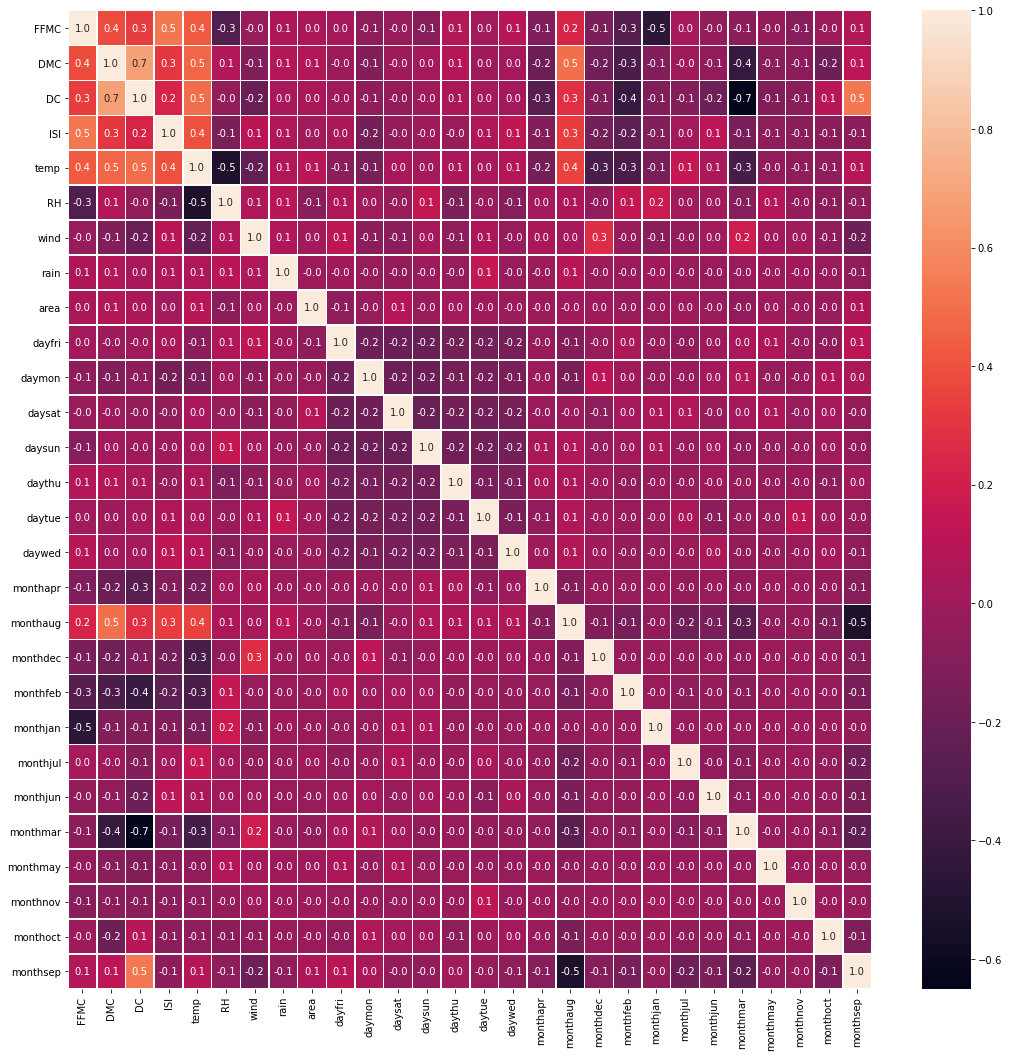

In [5]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [6]:
data.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


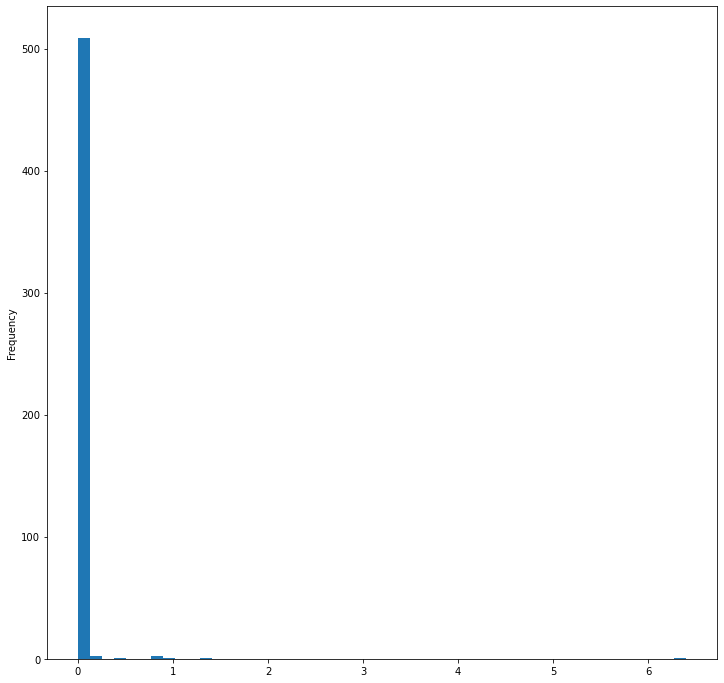

In [8]:
# Histogram
# bins = number of bar in figure
data.rain.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [9]:
series = data['ISI']        # data['Defense'] = series
print(type(series))
data_frame = data[['ISI']]  # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
# 1 - Filtering Pandas data frame
x = data['rain']>1     # There are only 3 pokemons who have higher defense value than 200
data[x]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
499,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,...,0,0,0,0,0,0,0,0,0,large
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,...,0,0,0,0,0,0,0,0,0,small


In [11]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['rain']<1) & (data['temp']>30)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
28,sep,sat,93.4,145.4,721.4,8.1,30.2,24,2.7,0.0,...,0,0,0,0,0,0,0,0,1,small
421,aug,wed,95.2,217.7,690.0,18.0,30.8,19,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
480,jul,thu,93.2,114.4,560.0,9.5,30.2,25,4.5,0.0,...,0,0,1,0,0,0,0,0,0,small
481,jul,thu,93.2,114.4,560.0,9.5,30.2,22,4.9,0.0,...,0,0,1,0,0,0,0,0,0,small
483,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
484,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,...,0,0,0,0,0,0,0,0,0,large
485,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
491,aug,thu,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
492,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
494,aug,sat,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,...,0,0,0,0,0,0,0,0,0,large


In [12]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [13]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

EXPLORATORY DATA ANALYSIS value_counts(): Frequency counts

Lets say value at 75% is Q3 and value at 25% is Q1.
Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR We will use describe() method. Describe method includes:
count: number of entries
mean: average of entries
std: standart deviation
min: minimum entry
25%: first quantile
50%: median or second quantile
75%: third quantile
max: maximum entry
1,4,5,6,8,9,11,12,13,14,15,16,17
The median is the number that is in middle of the sequence. In this case it would be 11.

In [14]:
#For example lets look frequency of months types
print(data['month'].value_counts(dropna =False))  # if there are nan values that also be counted

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64


In [15]:
#for example max temp 33.3 min wind 0.4
data.describe() #ignore null entries

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

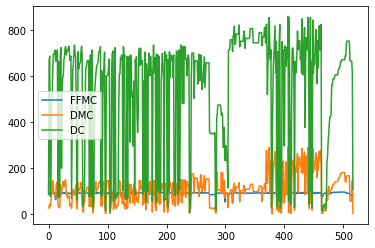

In [16]:
# Plotting all data 
data1 = data.loc[:,["FFMC","DMC","DC"]]
data1.plot()
# it is confusing

INDEXING PANDAS TIME SERIES

datetime = object
parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [18]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [19]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
date,,,,,,,,,,,,,,,,,,,,,
1992-01-10,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1992-02-10,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
1992-03-10,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
1993-03-15,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
1993-03-16,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [20]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

month              mar
day                sun
FFMC              89.3
DMC               51.3
DC               102.2
ISI                9.6
temp              11.4
RH                  99
wind               1.8
rain               0.0
area               0.0
dayfri               0
daymon               0
daysat               0
daysun               1
daythu               0
daytue               0
daywed               0
monthapr             0
monthaug             0
monthdec             0
monthfeb             0
monthjan             0
monthjul             0
monthjun             0
monthmar             1
monthmay             0
monthnov             0
monthoct             0
monthsep             0
size_category    small
Name: 1993-03-16 00:00:00, dtype: object
           month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  \
date                                                                 ...   
1992-03-10   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...   
1993-03-15   mar  

INDEXING DATA FRAMES

Indexing using square brackets
Using column attribute and row label
Using loc accessor
Selecting only some columns

In [21]:
# indexing using square brackets
data["temp"][1]

18.0

In [22]:
# using loc accessor
data.loc[1,["temp"]]

temp    18.0
Name: 1, dtype: object

In [23]:
# Selecting only some columns
data[["temp","rain"]]

,temp,rain
0,8.2,0.0
1,18.0,0.0
2,14.6,0.0
3,8.3,0.2
4,11.4,0.0
...,...,...
512,27.8,0.0
513,21.9,0.0
514,21.2,0.0
515,25.6,0.0


SLICING DATA FRAME

Difference between selecting columns
Series and data frames
Slicing and indexing series
Reverse slicing
From something to end

In [24]:
# Slicing and indexing series
data.loc[1:10,"temp":"rain"]   # 10 and "Defense" are inclusive

,temp,RH,wind,rain
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
5,22.2,29,5.4,0.0
6,24.1,27,3.1,0.0
7,8.0,86,2.2,0.0
8,13.1,63,5.4,0.0
9,22.8,40,4.0,0.0
10,17.8,51,7.2,0.0


In [25]:
# From something to end
data.loc[1:10,"ISI":] 

,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,small
2,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,small
3,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,small
4,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,small
5,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,small
6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,small
7,10.7,8.0,86,2.2,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,small
8,7.0,13.1,63,5.4,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,small
9,7.1,22.8,40,4.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,small
10,7.1,17.8,51,7.2,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,small


FILTERING DATA FRAMES

In [27]:
# Creating boolean series
boolean = data.temp > 30
data[boolean]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
28,sep,sat,93.4,145.4,721.4,8.1,30.2,24,2.7,0.0,...,0,0,0,0,0,0,0,0,1,small
421,aug,wed,95.2,217.7,690.0,18.0,30.8,19,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
480,jul,thu,93.2,114.4,560.0,9.5,30.2,25,4.5,0.0,...,0,0,1,0,0,0,0,0,0,small
481,jul,thu,93.2,114.4,560.0,9.5,30.2,22,4.9,0.0,...,0,0,1,0,0,0,0,0,0,small
483,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
484,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,...,0,0,0,0,0,0,0,0,0,large
485,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
491,aug,thu,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
492,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
494,aug,sat,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,...,0,0,0,0,0,0,0,0,0,large


In [28]:
# Combining filters
first_filter = data.temp > 30
second_filter = data.ISI > 10
data[first_filter & second_filter]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
421,aug,wed,95.2,217.7,690.0,18.0,30.8,19,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
483,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
484,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,...,0,0,0,0,0,0,0,0,0,large
485,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
491,aug,thu,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
492,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
494,aug,sat,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,...,0,0,0,0,0,0,0,0,0,large
496,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
497,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,...,0,0,0,0,0,0,0,0,0,large
498,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large


INDEX OBJECTS AND LABELED DATA

In [29]:
# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()

None


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
index_name,,,,,,,,,,,,,,,,,,,,,
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


HIERARCHICAL INDEXING

In [30]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["month","temp"]) 
data1.head(100)

day  FFMC    DMC     DC   ISI  RH  wind  rain  area  dayfri  ...  \
month temp                                                               ...   
mar   8.2   fri  86.2   26.2   94.3   5.1  51   6.7   0.0   0.0       1  ...   
oct   18.0  tue  90.6   35.4  669.1   6.7  33   0.9   0.0   0.0       0  ...   
      14.6  sat  90.6   43.7  686.9   6.7  33   1.3   0.0   0.0       0  ...   
mar   8.3   fri  91.7   33.3   77.5   9.0  97   4.0   0.2   0.0       1  ...   
      11.4  sun  89.3   51.3  102.2   9.6  99   1.8   0.0   0.0       0  ...   
...         ...   ...    ...    ...   ...  ..   ...   ...   ...     ...  ...   
sep   17.8  sun  89.7   90.0  704.4   4.8  64   1.3   0.0   0.0       0  ...   
feb   12.7  sat  83.9    8.0   30.2   2.6  48   1.8   0.0   0.0       0  ...   
mar   17.4  sat  69.0    2.4   15.5   0.7  24   5.4   0.0   0.0       0  ...   
aug   11.6  sun  91.4  142.4  601.4  10.6  87   4.5   0.0   0.0       0  ...   
      19.8  sun  91.4  142.4  601.4  10.6  39   5.4   0.0   0.0       0  ...   

            monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
month temp                                                               
mar   8.2          0         0         0         0         1         0   
oct   18.0         0         0         0         0         0         0   
      14.6         0         0         0         0         0         0   
mar   8.3          0         0         0         0         1         0   
      11.4         0         0         0         0         1         0   
...              ...       ...       ...       ...       ...       ...   
sep   17.8         0         0         0         0         0         0   
feb   12.7         1         0         0         0         0         0   
mar   17.4         0         0         0         0         1         0   
aug   11.6         0         0         0         0         0         0   
      19.8         0         0         0         0         0         0   

            monthnov  monthoct  monthsep  size_category  
month temp                                               
mar   8.2          0         0         0          small  
oct   18.0         0         1         0          small  
      14.6         0         1         0          small  
mar   8.3          0         0         0          small  
      11.4         0         0         0          small  
...              ...       ...       ...            ...  
sep   17.8         0         0         1          small  
feb   12.7         0         0         0          small  
mar   17.4         0         0         0          small  
aug   11.6         0         0         0          small  
      19.8         0         0         0          small  

[100 rows x 29 columns]